In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re
import numpy as np
from utils import *

In [2]:
# Set Pandas option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../data/ncdatachallenge-2021-v1.csv', index_col=0)

In [4]:
df = df.replace("NA", None)

In [5]:
df.columns

Index(['bmi', 'age', 'country', 'been_pregnant_before', 'education',
       'sleeping_pattern', 'n_cycles_trying', 'outcome', 'dedication',
       'average_cycle_length', 'cycle_length_std', 'regular_cycle',
       'intercourse_frequency'],
      dtype='object')

In [6]:
df.shape

(1995, 13)

In [7]:
n_pregnant = df[df.outcome=='pregnant'].shape[0]

n_pregnant_13 = df[(df.outcome=='pregnant') & (df.n_cycles_trying<=13)].shape[0]

n_not_pregnant = df[df.outcome=='not_pregnant'].shape[0]

n_not_pregnant_13 =df[(df.outcome=='not_pregnant') & (df.n_cycles_trying>=13)].shape[0]

n_not_pregnant_less13 = df[(df.outcome=='not_pregnant') & (df.n_cycles_trying<13)].shape[0]

n_tot = df.shape[0]

# All the women who achieved pregnangy did so within 13 cycles
# 683 women were not followed for up to 13 cycles
# To have a quick estimate of the bounds I expect for the probability of pregnancy by the 13th cycle:
# Lower: all the 683 did not get pregnant by 13 cycles
# Higher: all the 683 did get pregnant by 13 cycles

print(f"n_prengant: {n_pregnant}, n_pregnant_13: {n_pregnant_13}, n_not_pregnant: {n_not_pregnant}, n_not_pregnant_13: {n_not_pregnant_13}, n_not_pregnant_less13: {n_not_pregnant_less13}")
p13_high = (n_pregnant_13 + n_not_pregnant_less13) / n_tot
p13_low = (n_pregnant_13) / n_tot
print(f"P low: {p13_low}")
print(f"P high: {p13_high}")

n_prengant: 1148, n_pregnant_13: 1148, n_not_pregnant: 847, n_not_pregnant_13: 164, n_not_pregnant_less13: 683
P low: 0.5754385964912281
P high: 0.9177944862155388


In [8]:
n_pregnant

1148

In [9]:
# Basic info and missing values
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1995 entries, 0 to 2000
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   bmi                    1995 non-null   float64
 1   age                    1995 non-null   int64  
 2   country                1882 non-null   object 
 3   been_pregnant_before   1678 non-null   object 
 4   education              1604 non-null   object 
 5   sleeping_pattern       1496 non-null   object 
 6   n_cycles_trying        1995 non-null   int64  
 7   outcome                1995 non-null   object 
 8   dedication             1995 non-null   float64
 9   average_cycle_length   1989 non-null   float64
 10  cycle_length_std       1970 non-null   float64
 11  regular_cycle          1989 non-null   object 
 12  intercourse_frequency  1995 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 218.2+ KB
None

Missing Values:
bmi               

In [10]:
# Outcome distribution
print("\nOutcome:")
print(df['outcome'].value_counts(dropna=False))


Outcome:
outcome
pregnant        1148
not_pregnant     847
Name: count, dtype: int64


In [11]:
# Summary statistics for numerical columns
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,bmi,age,n_cycles_trying,dedication,average_cycle_length,cycle_length_std,intercourse_frequency
count,1995.000000,1995.000000,1995.000000,1995.000000,1989.000000,1970.000000,1995.000000
mean,23.357643,31.898747,4.725815,0.475641,30.530185,4.465253,0.106986
std,4.982275,4.063534,4.600871,0.335528,7.010407,8.675280,0.105248
min,0.000000,19.000000,1.000000,0.000000,19.500000,0.000000,0.000000
25%,20.708276,29.000000,1.000000,0.132567,27.176471,1.718249,0.020000
50%,22.530864,32.000000,3.000000,0.505415,29.000000,2.542727,0.080214
75%,25.303154,35.000000,6.000000,0.780816,31.666667,4.272002,0.162195
max,50.611299,44.000000,26.000000,1.347826,145.500000,168.998521,0.793103


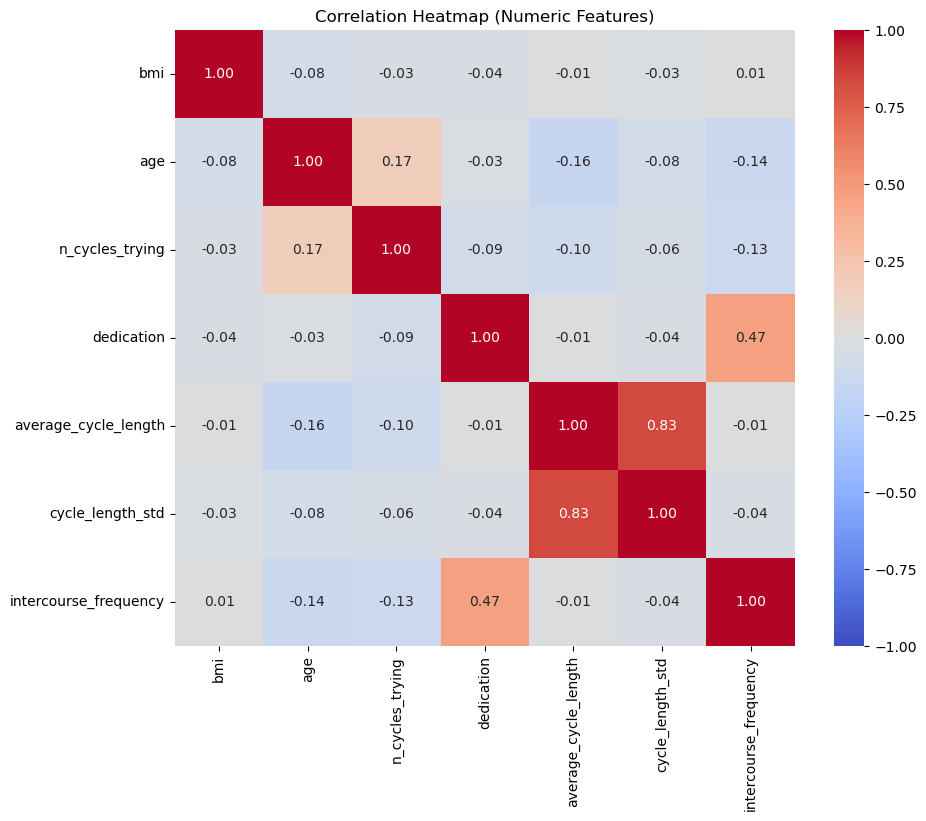

Plot saved as ../plots/correlation_matrix_original.jpg


In [12]:
# Correlation matrix for numerical variables
plot_correlation_matrix(df, plot_name="correlation_matrix_original", output_folder="../plots")

In [13]:
def is_zero(num, epsilon=1e-6):
    return abs(num) < epsilon

In [14]:
df.intercourse_frequency.apply(lambda x: is_zero(x)).value_counts()

intercourse_frequency
False    1623
True      372
Name: count, dtype: int64

In [15]:
df.dedication.apply(lambda x: is_zero(x)).value_counts()

dedication
False    1737
True      258
Name: count, dtype: int64

In [16]:
258/(len(df))

0.1293233082706767

In [17]:
372/len(df)

0.18646616541353384

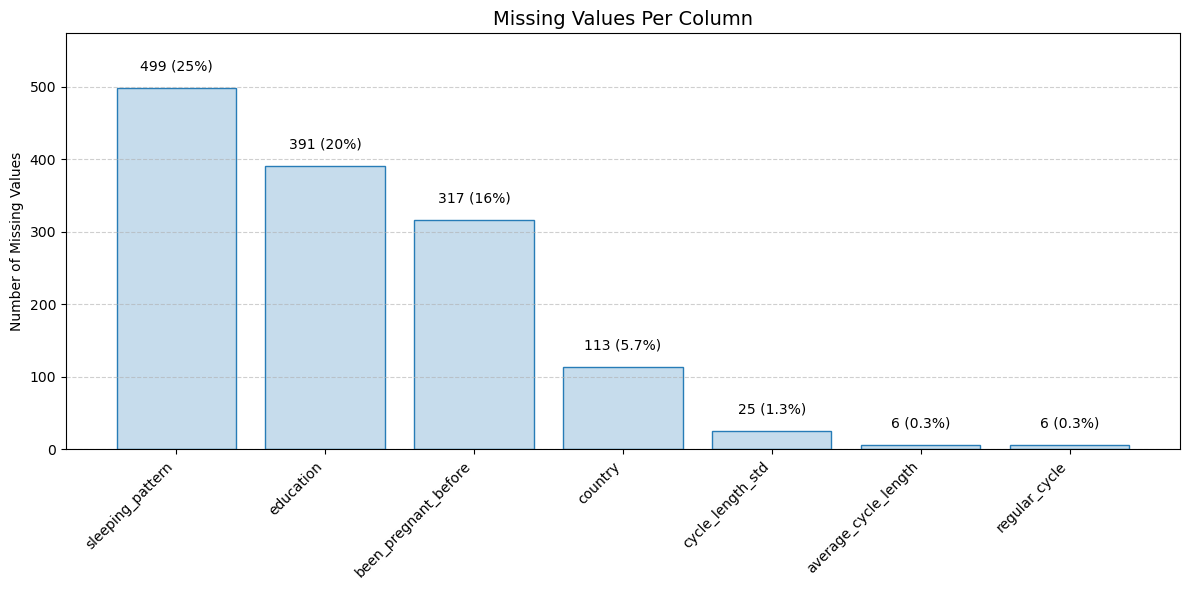

Plot saved to: ../plots/missing_values.jpg


In [18]:
plot_missing_values(df)

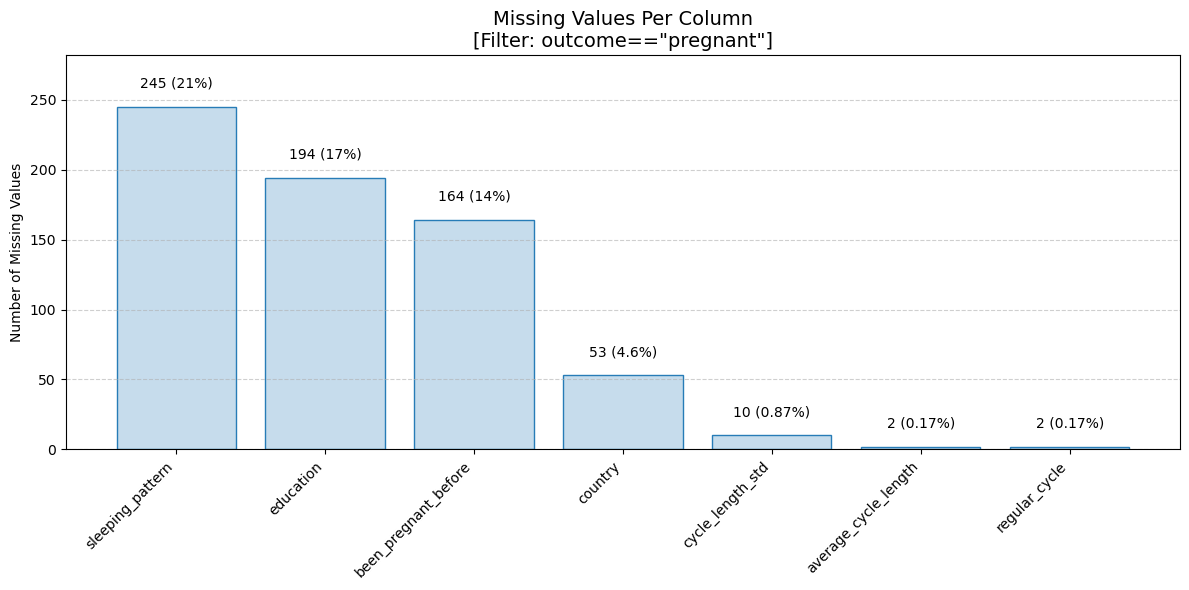

Plot saved to: ../plots/missing_values__outcome_pregnant_.jpg


In [19]:
plot_missing_values(df, query_string='outcome=="pregnant"')

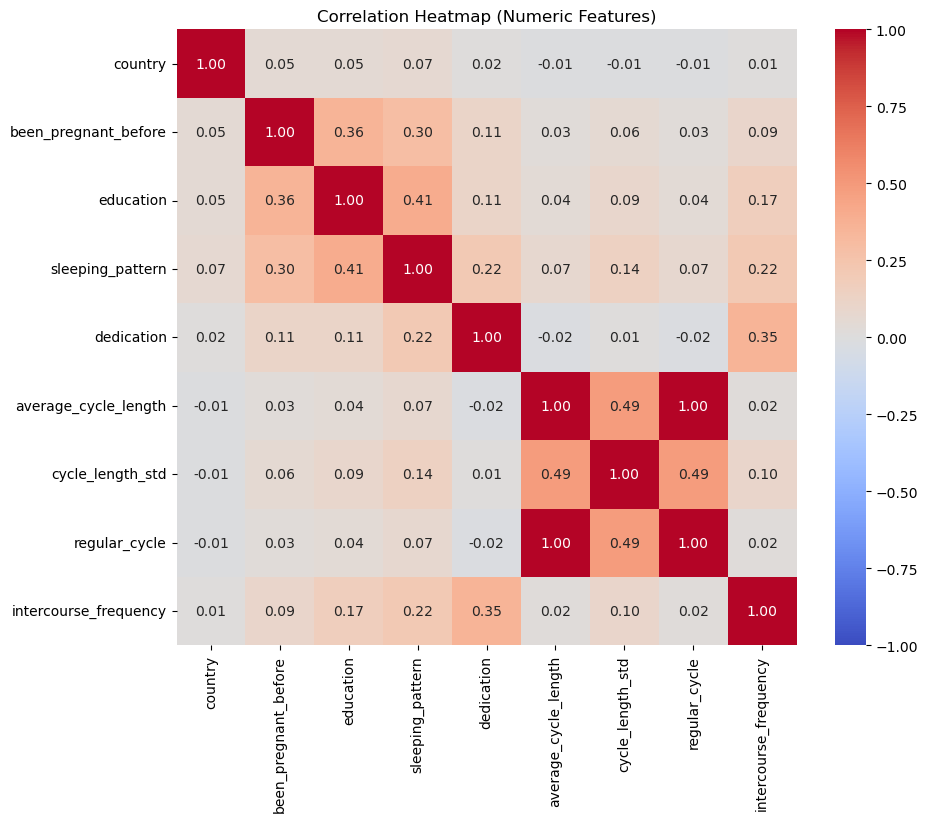

Plot saved as ../plots/correlation_matrix_missing_values.jpg


In [20]:
df_dedication = df.copy()
df_dedication['dedication'] = df_dedication['dedication'].apply(lambda x: None if is_zero(x) else x)
df_dedication['intercourse_frequency'] = df_dedication['intercourse_frequency'].apply(lambda x: None if is_zero(x) else x)
df_with_na = df_dedication.loc[:, df_dedication.isna().any()]
plot_correlation_matrix(df_with_na.isna().map(lambda x: int(x)), plot_name="correlation_matrix_missing_values", output_folder="../plots")

Plotting column: country


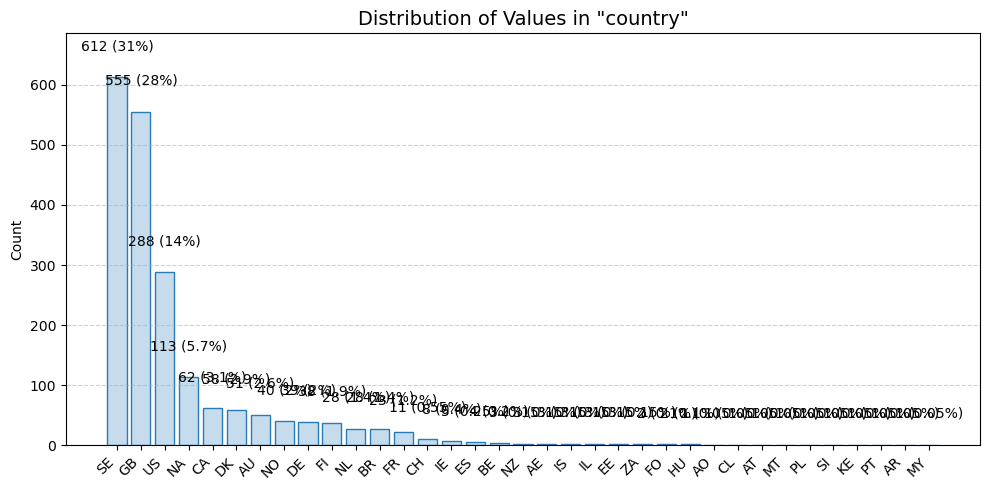

Plot saved to: ../plots/country.jpg
Plotting column: been_pregnant_before


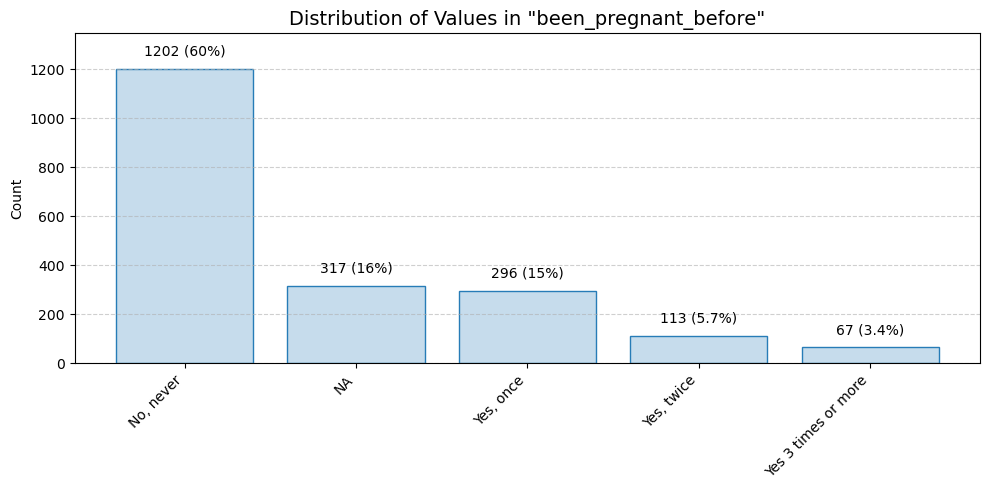

Plot saved to: ../plots/been_pregnant_before.jpg
Plotting column: education


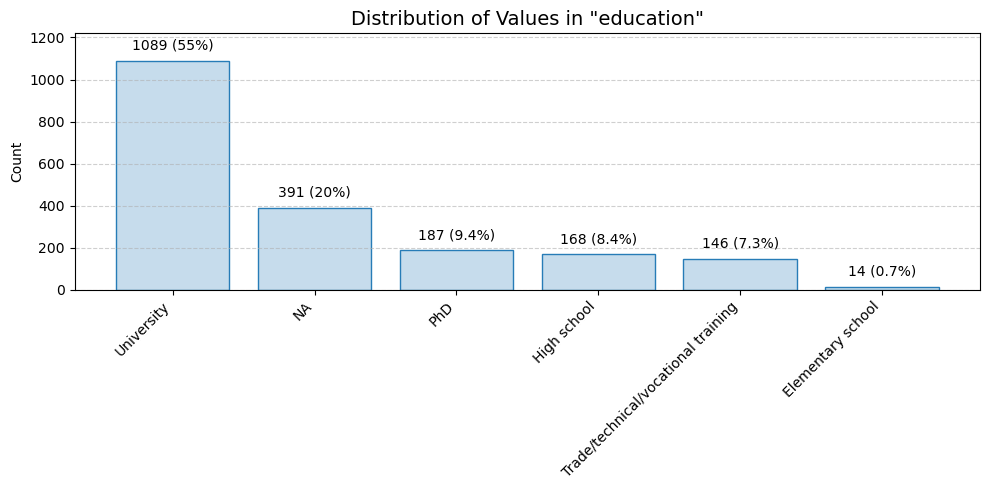

Plot saved to: ../plots/education.jpg
Plotting column: sleeping_pattern


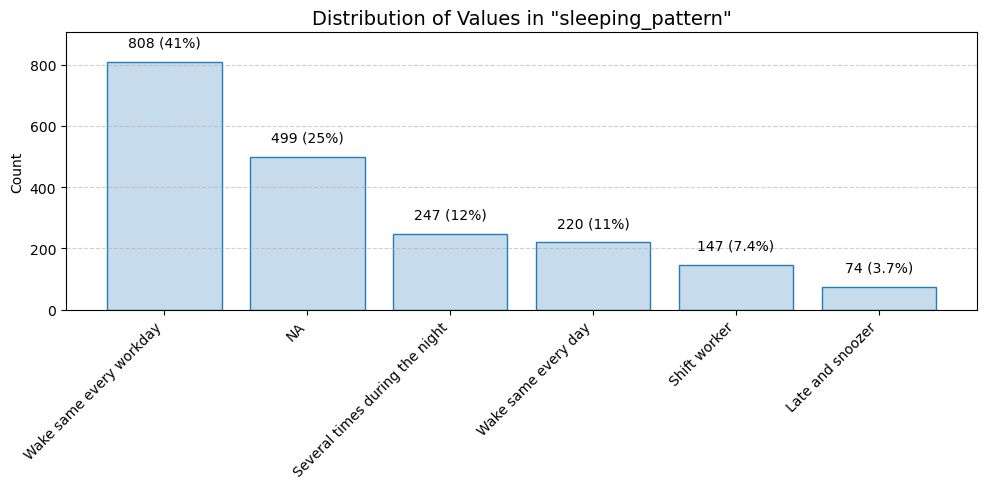

Plot saved to: ../plots/sleeping_pattern.jpg
Plotting column: outcome


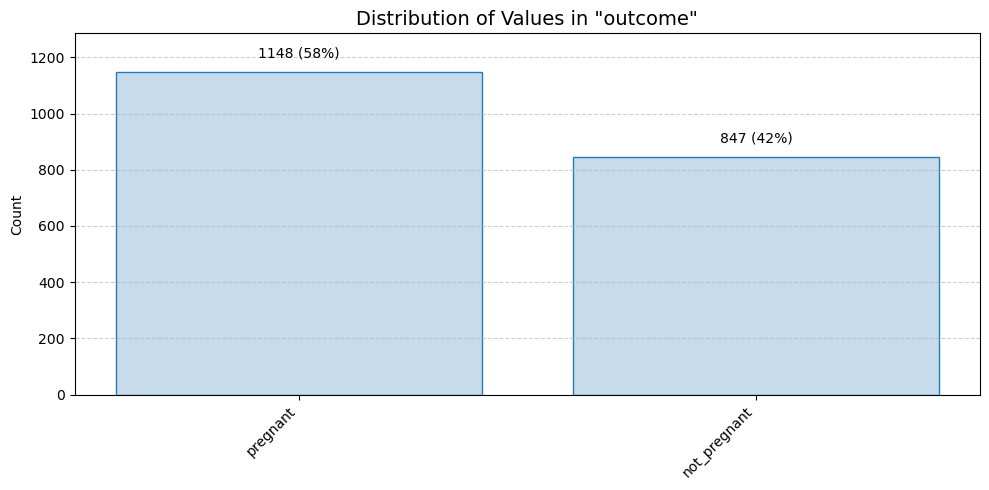

Plot saved to: ../plots/outcome.jpg
Plotting column: regular_cycle


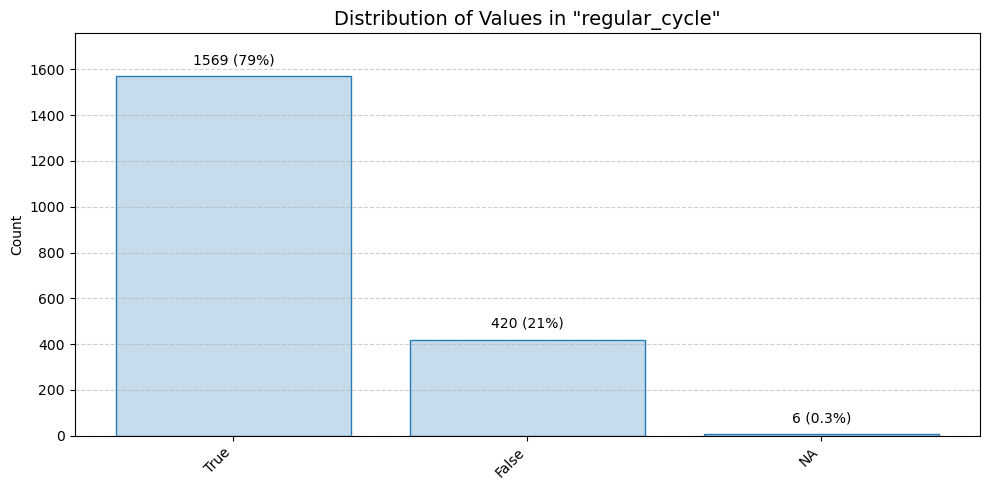

Plot saved to: ../plots/regular_cycle.jpg


In [21]:
for col in df.select_dtypes(include='object').columns:
    print(f"Plotting column: {col}")
    plot_value_counts(df, col)

Plotting numerical column: bmi


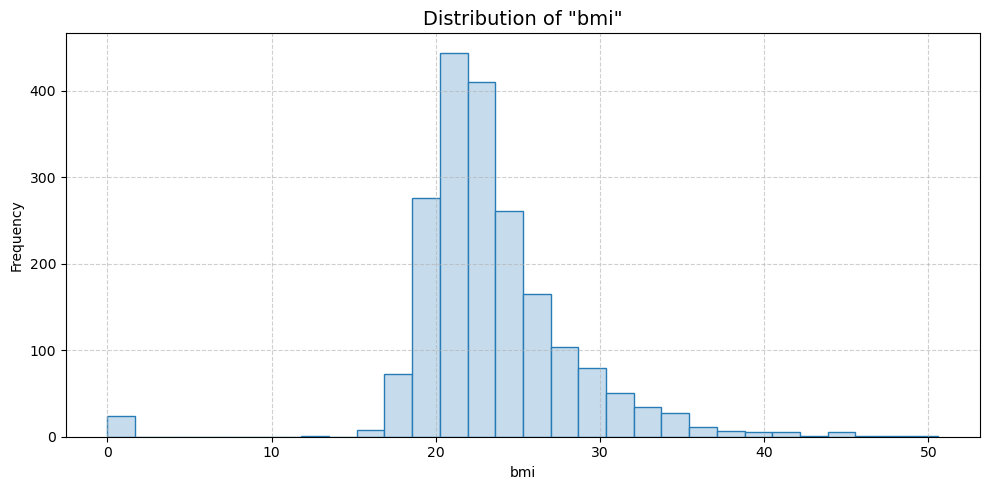

Plot saved to: ../plots/bmi.jpg
Plotting numerical column: age


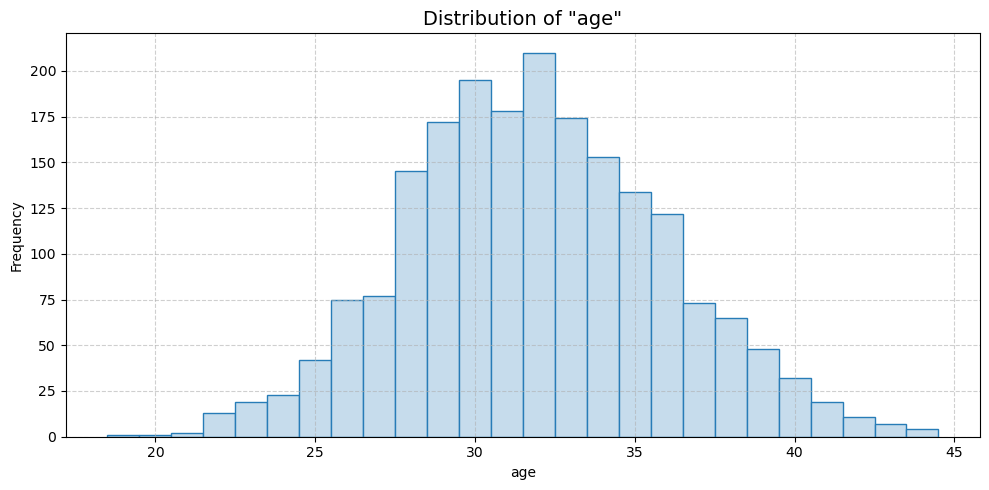

Plot saved to: ../plots/age.jpg
Plotting numerical column: n_cycles_trying


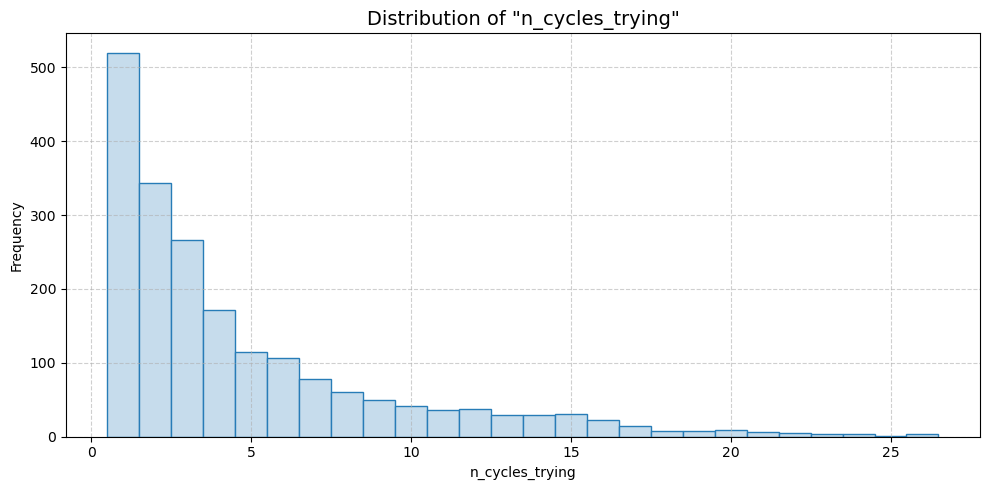

Plot saved to: ../plots/n_cycles_trying.jpg
Plotting numerical column: dedication


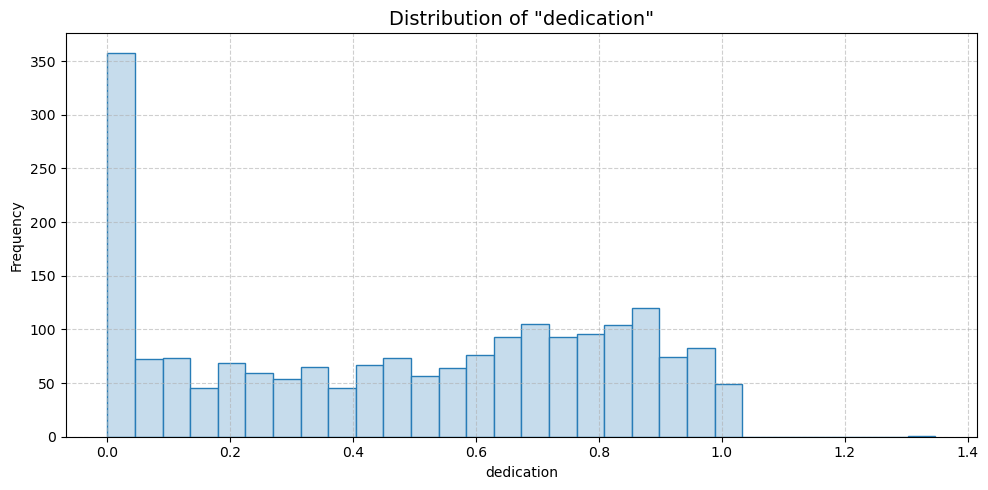

Plot saved to: ../plots/dedication.jpg
Plotting numerical column: average_cycle_length


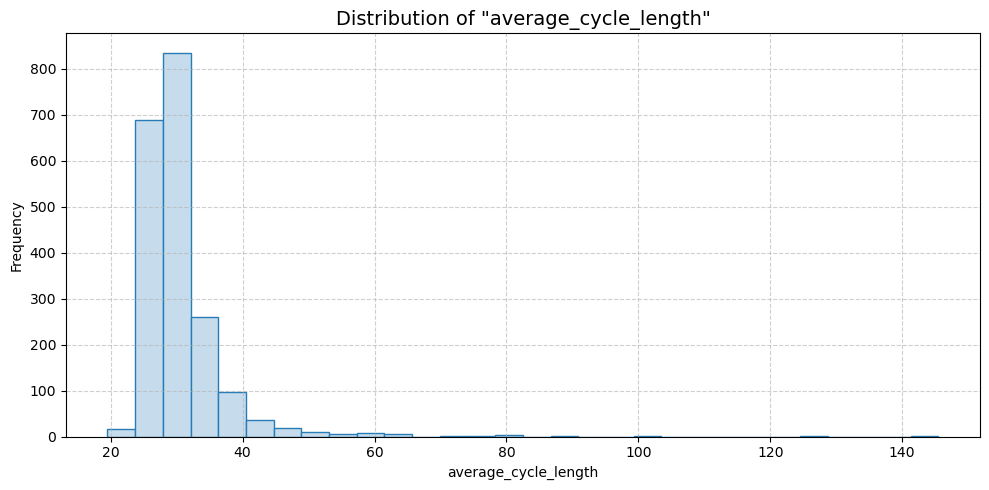

Plot saved to: ../plots/average_cycle_length.jpg
Plotting numerical column: cycle_length_std


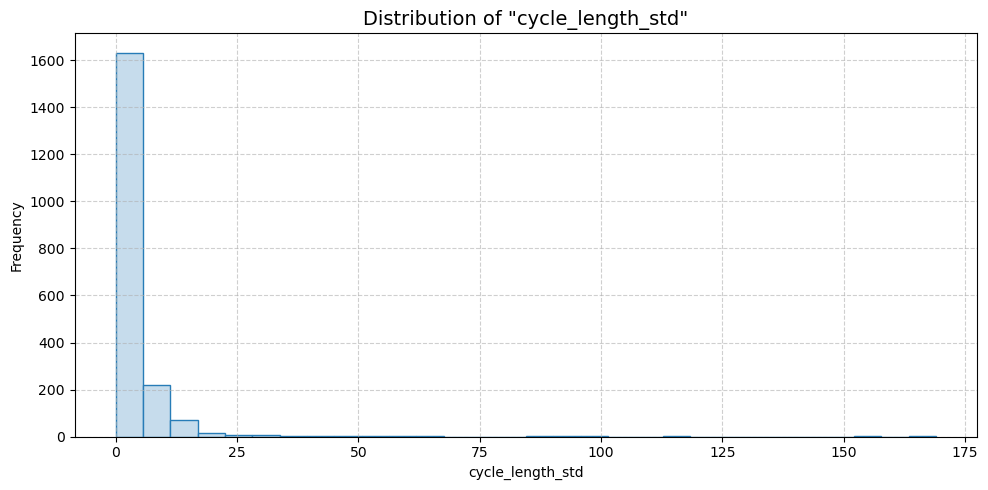

Plot saved to: ../plots/cycle_length_std.jpg
Plotting numerical column: intercourse_frequency


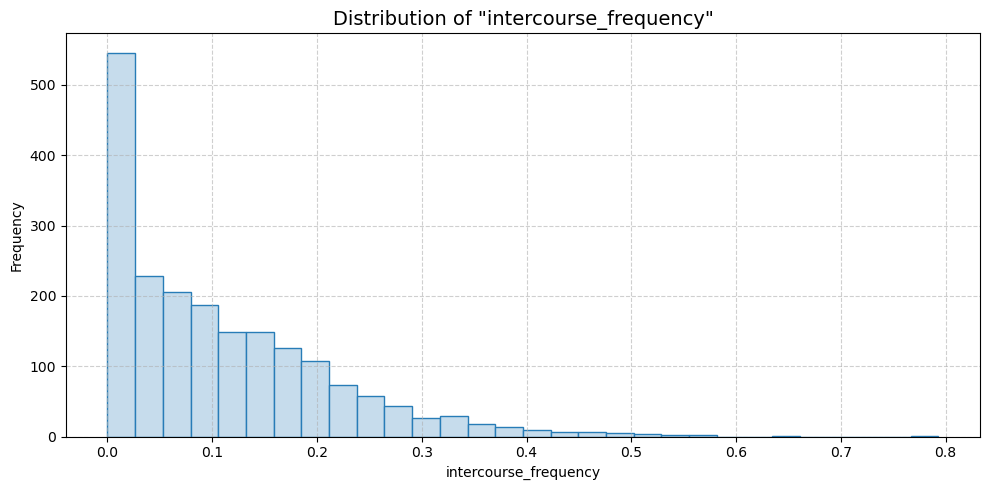

Plot saved to: ../plots/intercourse_frequency.jpg


In [22]:
for col in df.select_dtypes(include='number').columns:
    print(f"Plotting numerical column: {col}")
    plot_numerical_distribution(df, col)

In [23]:
# Turn categorical columns where it makes sense into numerical ones to visualize correlations

# Define mappings based on actual values and logical order
education_order = {
    "Elementary school": 0,
    "High school": 1,
    "Trade/technical/vocational training": 2,
    "University": 3,
    "PhD": 4
}

sleeping_order = {
    "Several times during the night": 0,
    "Shift worker": 1,
    "Late and snoozer": 2,
    "Wake same every workday": 3,
    "Wake same every day": 4
}


pregnancy_order = {
    "No, never": 0,
    "Yes, once": 1,
    "Yes, twice": 2,
    "Yes 3 times or more": 3
}

outcome_numeric = {
    "pregnant": 1,
    "not_pregnant": 0
}

university_education = {
    "Elementary school": False,
    "High school": False,
    "Trade/technical/vocational training": False,
    "University": True,
    "PhD": True
}

regular_sleep = {
    "Several times during the night": False,
    "Shift worker": False,
    "Late and snoozer": False,
    "Wake same every workday": True,
    "Wake same every day": True
}

pregnancy_binary = {
    "No, never": False,
    "Yes, once": True,
    "Yes, twice": True,
    "Yes 3 times or more": True
}


# Map these to new columns
df['university_education'] = df['education'].map(university_education)
df['regular_sleep'] = df['sleeping_pattern'].map(regular_sleep)
df['been_pregnant_before_binary'] = df['been_pregnant_before'].map(pregnancy_binary)

df['education_numeric'] = df['education'].map(education_order)
df['sleeping_pattern_numeric'] = df['sleeping_pattern'].map(sleeping_order)
df['been_pregnant_before_numeric'] = df['been_pregnant_before'].map(pregnancy_order)
df['outcome_pregnant'] = df['outcome'].map(outcome_numeric)
df['regular_cycle_numeric'] = df['regular_cycle'].astype(str).map({"False": 0, "True": 1})

In [24]:
# Compute and round the quartiles for age, intercourse_frequency, and dedication
quartiles_summary = {}

for col in ['age', 'intercourse_frequency', 'dedication', 'average_cycle_length', 'bmi']:
    quartiles = df[col].quantile([0.25, 0.5, 0.75]).round(3)
    quartiles_summary[col] = quartiles.tolist()

print(quartiles_summary)

{'age': [29.0, 32.0, 35.0], 'intercourse_frequency': [0.02, 0.08, 0.162], 'dedication': [0.133, 0.505, 0.781], 'average_cycle_length': [27.176, 29.0, 31.667], 'bmi': [20.708, 22.531, 25.303]}


In [25]:
# Define categorization functions based on rounded quartiles

def categorize_age(age): # OK
    if pd.isna(age):
        return pd.NA
    elif age <= 29: # 25%
        return '19-29'
    elif age <= 35: # 50%
        return '30-35'
    else: # 25%
        return '35-44'

def categorize_intercourse_frequency(freq): # OK
    if pd.isna(freq):
        return pd.NA
    elif freq <= 0.02:
        return 'low'
    elif freq <= 0.162:
        return 'medium'
    else:
        return 'high'

def categorize_dedication(ded): # OK
    if pd.isna(ded):
        return pd.NA
    elif ded <= 0.133: # 25%
        return 'low'
    elif ded <= 0.781: # 50%
        return 'medium'
    else:
        return 'high' # 25%

# Apply the categorization
df['age_group'] = df['age'].apply(categorize_age)
df['intercourse_frequency_group'] = df['intercourse_frequency'].apply(categorize_intercourse_frequency)
df['dedication_group'] = df['dedication'].apply(categorize_dedication)

# Show a few examples
df[['age', 'age_group', 'intercourse_frequency', 'intercourse_frequency_group', 'dedication', 'dedication_group']].head()

,age,age_group,intercourse_frequency,intercourse_frequency_group,dedication,dedication_group
0,31,30-35,0.200000,high,0.640000,medium
1,34,30-35,0.052632,medium,0.009569,low
2,41,35-44,0.149123,medium,0.298246,medium
3,27,19-29,0.145833,medium,0.895833,high
4,29,19-29,0.254902,high,0.666667,medium


In [26]:
# For bmi and average cycle lenght, I've chosen to use a categorization based on what's considered "normal" from a biological point of view

# Group 'bmi' using standard WHO categories
def categorize_bmi(bmi): # OK
    if pd.isna(bmi):
        return pd.NA
    elif bmi < 18.5:
        return 'underweight'
    elif 18.5 <= bmi < 25:
        return 'normal'
    # WHO definition: 25-30 overweight, >30 obese. I group overweight and obese
    else:
        return 'overweight'

    
    
df['bmi_group'] = df['bmi'].apply(categorize_bmi) 
    
# Group 'average_cycle_length' into <21, 21-35, >35 days
def categorize_cycle_length(length): # ok
    if pd.isna(length):
        return pd.NA
    elif length < 21:
        return '<21 OR >35'
    elif 21 <= length <= 35:
        return '21-35'
    else:
        return '<21 OR >35'
    
df['average_cycle_length_group'] = df['average_cycle_length'].apply(categorize_cycle_length)

In [27]:
# Define the region map
region_map = {
    'SE': 'Nordic', 'DK': 'Nordic', 'NO': 'Nordic', 'FI': 'Nordic', 'IS': 'Nordic', 'FO': 'Nordic',
    'GB': 'Western Europe', 'IE': 'Western Europe', 'FR': 'Western Europe', 'BE': 'Western Europe',
    'NL': 'Western Europe', 'CH': 'Western Europe', 'DE': 'Western Europe', 'AT': 'Western Europe',
    'ES': 'Southern Europe', 'PT': 'Southern Europe', 'IT': 'Southern Europe', 'MT': 'Southern Europe',
    'EE': 'Eastern Europe', 'PL': 'Eastern Europe', 'HU': 'Eastern Europe', 'SI': 'Eastern Europe',
    'US': 'North America', 'CA': 'North America',
    'AU': 'Oceania', 'NZ': 'Oceania',
    'BR': 'Latin America', 'CL': 'Latin America', 'AR': 'Latin America',
    'AE': 'Middle East', 'IL': 'Middle East',
    'ZA': 'Africa', 'AO': 'Africa', 'KE': 'Africa',
    'MY': 'Southeast Asia'
}

# Create a new column for region
df['region'] = df['country'].map(region_map)

In [28]:
# Print df columns

In [29]:
# Define a custom column order based on grouping related variables together

ordered_columns = [
        
    # Time trying
    'n_cycles_trying',
    
    # Outcome
    'outcome', 'outcome_pregnant',
    
    # BMI
    'bmi', 'bmi_group',
    
    # Age
    'age', 'age_group',
    
    # Country -> Region
    'country', 'region',
    
    # Been pregnant before
    'been_pregnant_before', 'been_pregnant_before_numeric', 'been_pregnant_before_binary',
    
    # Education
    'education', 'education_numeric', 'university_education',
    
    # Sleeping pattern
    'sleeping_pattern', 'sleeping_pattern_numeric', 'regular_sleep',
    
    # Cycle length
    'average_cycle_length', 'average_cycle_length_group',
    'cycle_length_std',  # no derived group yet

    # Regular cycle
    'regular_cycle', 'regular_cycle_numeric',
    
    # Intercourse frequency
    'intercourse_frequency', 'intercourse_frequency_group',
    
    # Dedication
    'dedication', 'dedication_group'
]

# Reorder DataFrame columns
df = df[ordered_columns]

In [30]:
df.head(50)

,n_cycles_trying,outcome,outcome_pregnant,bmi,bmi_group,age,age_group,country,region,been_pregnant_before,been_pregnant_before_numeric,been_pregnant_before_binary,education,education_numeric,university_education,sleeping_pattern,sleeping_pattern_numeric,regular_sleep,average_cycle_length,average_cycle_length_group,cycle_length_std,regular_cycle,regular_cycle_numeric,intercourse_frequency,intercourse_frequency_group,dedication,dedication_group
0,1,pregnant,1,22.942130,normal,31,30-35,SE,Nordic,"No, never",0.0,False,University,3.0,True,Wake same every workday,3.0,True,25.588235,21-35,2.526332,True,1.0,0.200000,high,0.640000,medium
1,7,pregnant,1,19.886054,normal,34,30-35,NaN,NaN,NaN,NaN,NaN,University,3.0,True,NaN,NaN,NaN,30.875000,21-35,3.522884,True,1.0,0.052632,medium,0.009569,low
2,4,not_pregnant,0,29.323049,overweight,41,35-44,SE,Nordic,"No, never",0.0,False,University,3.0,True,Several times during the night,0.0,False,27.666667,21-35,2.503331,True,1.0,0.149123,medium,0.298246,medium
3,2,pregnant,1,24.386526,normal,27,19-29,SE,Nordic,"No, never",0.0,False,High school,1.0,False,Wake same every workday,3.0,True,24.250000,21-35,3.453776,True,1.0,0.145833,medium,0.895833,high
4,2,pregnant,1,29.299971,overweight,29,19-29,SE,Nordic,"No, never",0.0,False,Trade/technical/vocational training,2.0,False,Wake same every day,4.0,True,25.466667,21-35,0.990430,True,1.0,0.254902,high,0.666667,medium
5,11,not_pregnant,0,21.461937,normal,34,30-35,NaN,NaN,"No, never",0.0,False,Trade/technical/vocational training,2.0,False,NaN,NaN,NaN,33.000000,21-35,3.346640,True,1.0,0.012000,low,0.060000,low
6,2,not_pregnant,0,38.766984,overweight,43,35-44,AU,Oceania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.714286,21-35,2.058663,True,1.0,0.000000,low,0.054545,low
7,2,pregnant,1,20.904195,normal,26,19-29,DK,Nordic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,<21 OR >35,13.341664,False,0.0,0.063063,medium,0.900901,high
8,8,not_pregnant,0,20.569330,normal,34,30-35,GB,Western Europe,NaN,NaN,NaN,PhD,4.0,True,NaN,NaN,NaN,30.842105,21-35,1.893356,True,1.0,0.032000,medium,0.000000,low
9,1,pregnant,1,27.450228,overweight,28,19-29,US,North America,"No, never",0.0,False,University,3.0,True,Wake same every workday,3.0,True,32.285714,21-35,4.214053,True,1.0,0.193548,high,0.000000,low


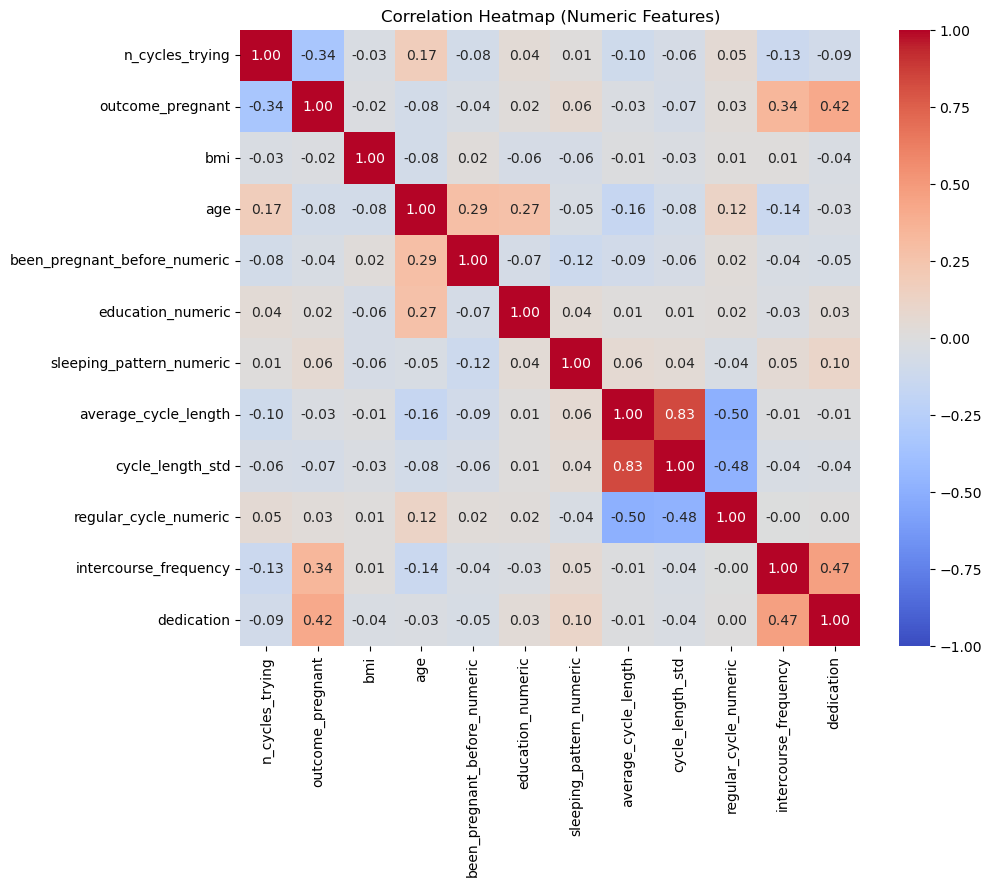

Plot saved as ../plots/correlation_matrix_original.jpg


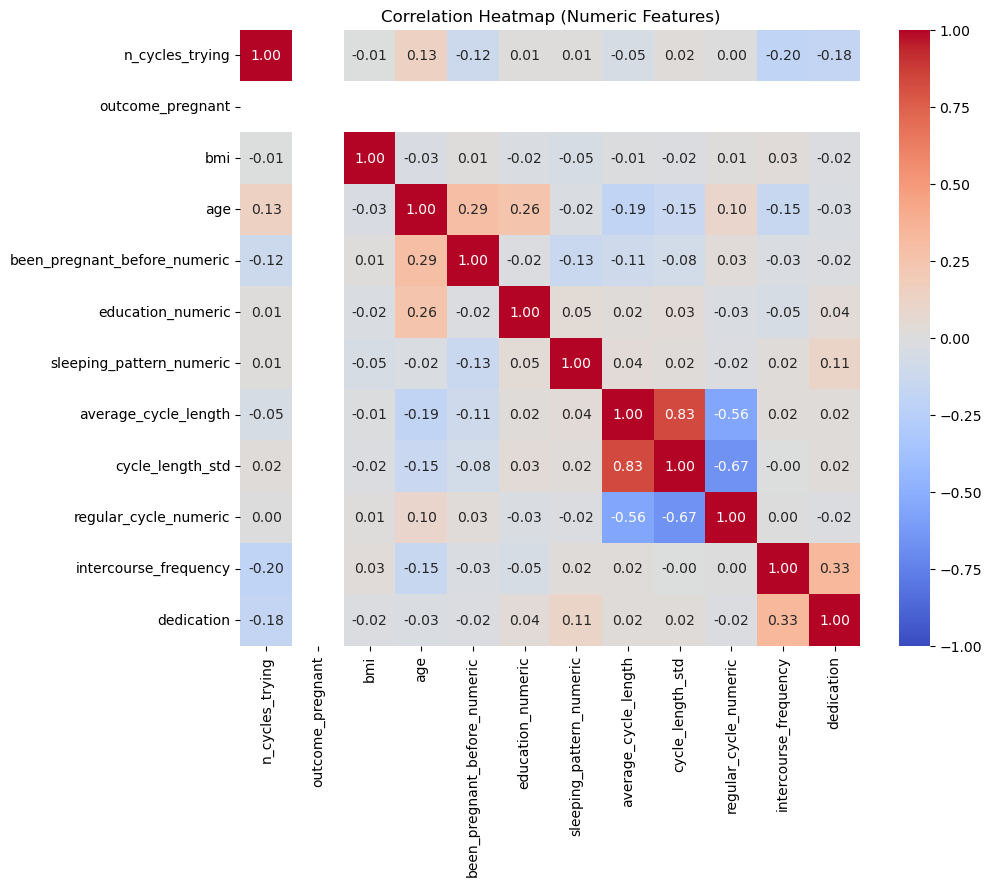

Plot saved as ../plots/correlation_matrix_original_outcome_pregnant.jpg


In [31]:
plot_correlation_matrix(df, plot_name='correlation_matrix_original')
plot_correlation_matrix(df, plot_name='correlation_matrix_original_outcome_pregnant', query_string='outcome=="pregnant"')

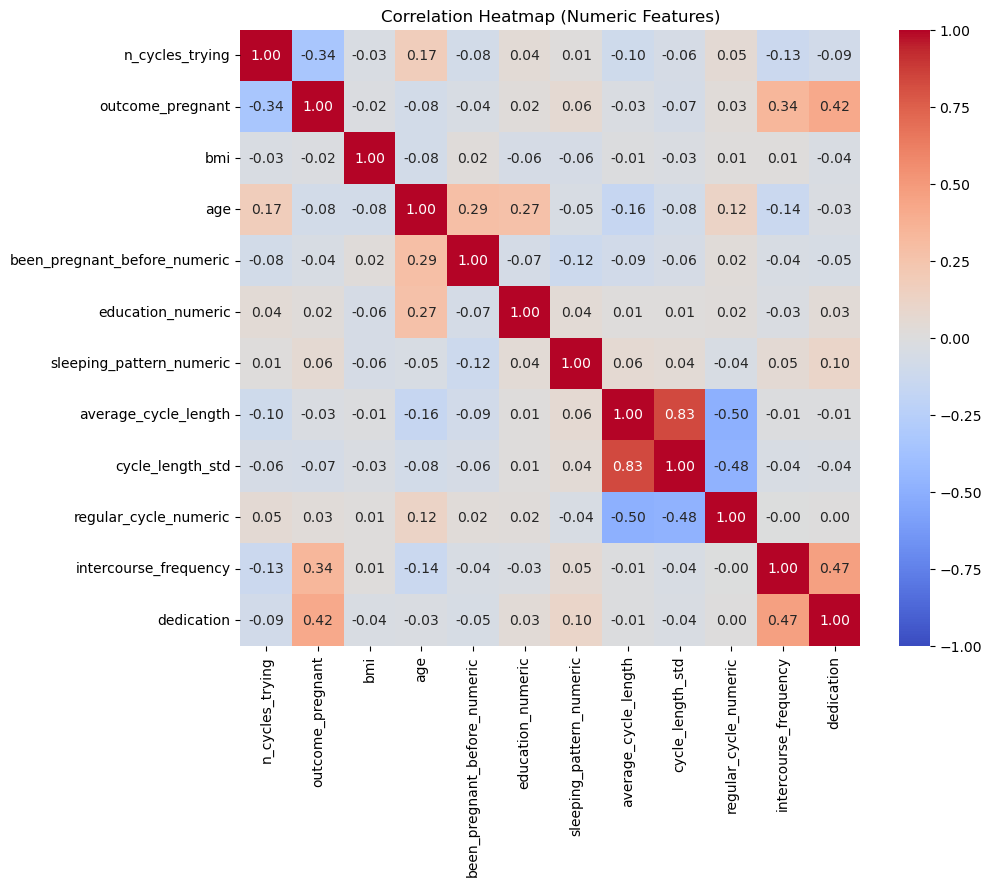

Plot saved as ../plots/correlation_matrix_new_variables.jpg


In [32]:
plot_correlation_matrix(df, plot_name="correlation_matrix_new_variables", output_folder="../plots")

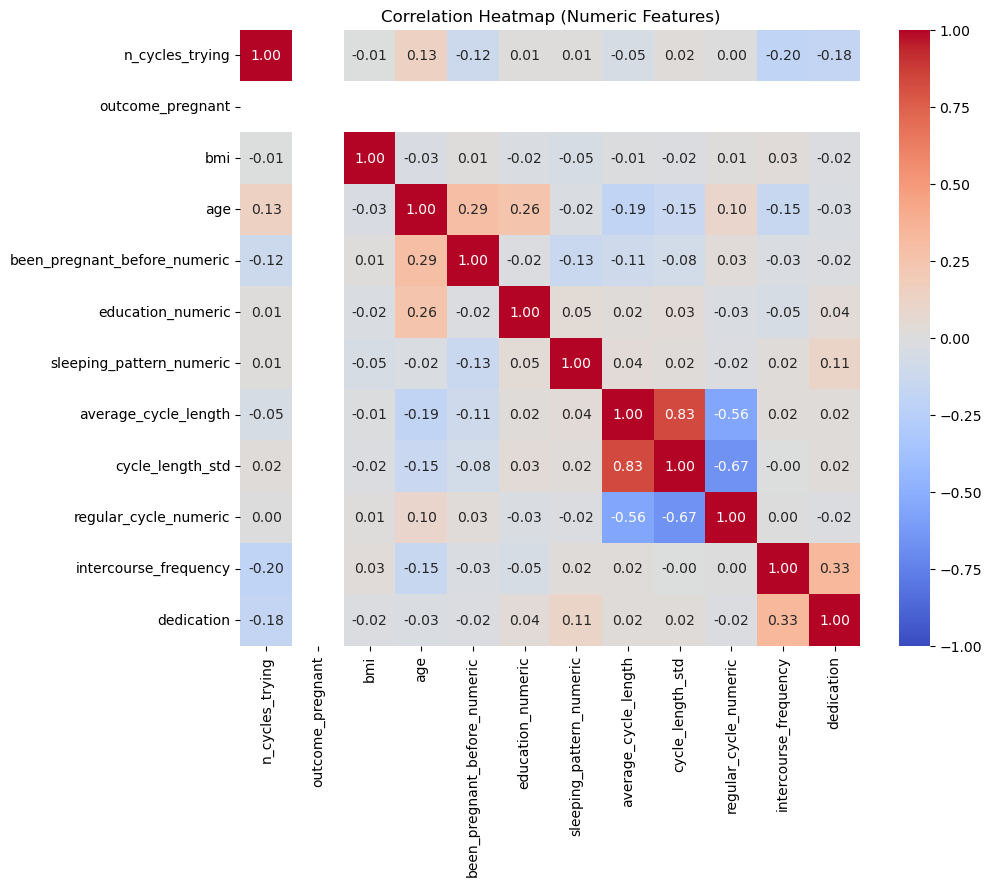

Plot saved as ../plots/correlation_matrix_new_variables_outcome_pregnant.jpg


In [33]:
plot_correlation_matrix(df, plot_name="correlation_matrix_new_variables_outcome_pregnant", output_folder="../plots",
                       query_string='outcome=="pregnant"')

In [34]:
df.to_csv('../data/modified_full.csv', index=False)

In [35]:
df.columns

Index(['n_cycles_trying', 'outcome', 'outcome_pregnant', 'bmi', 'bmi_group',
       'age', 'age_group', 'country', 'region', 'been_pregnant_before',
       'been_pregnant_before_numeric', 'been_pregnant_before_binary',
       'education', 'education_numeric', 'university_education',
       'sleeping_pattern', 'sleeping_pattern_numeric', 'regular_sleep',
       'average_cycle_length', 'average_cycle_length_group',
       'cycle_length_std', 'regular_cycle', 'regular_cycle_numeric',
       'intercourse_frequency', 'intercourse_frequency_group', 'dedication',
       'dedication_group'],
      dtype='object')

In [36]:
df_small = df[['n_cycles_trying', 'outcome_pregnant', 
               'age_group','bmi_group',
               'been_pregnant_before_binary', 
               'average_cycle_length_group', 'regular_cycle',
               'university_education', 'regular_sleep',
               'intercourse_frequency_group', 'dedication_group']]

Plotting column: n_cycles_trying


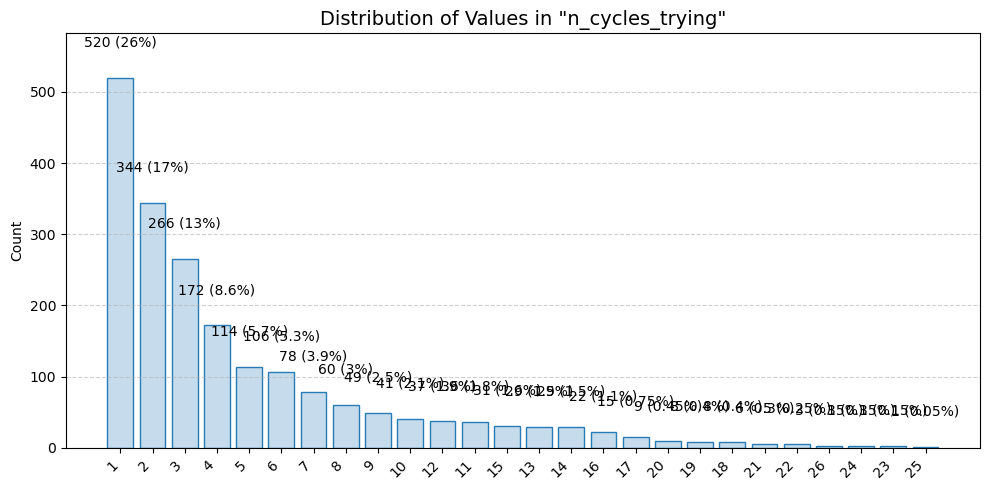

Plot saved to: ../plots/n_cycles_trying.jpg
Plotting column: outcome_pregnant


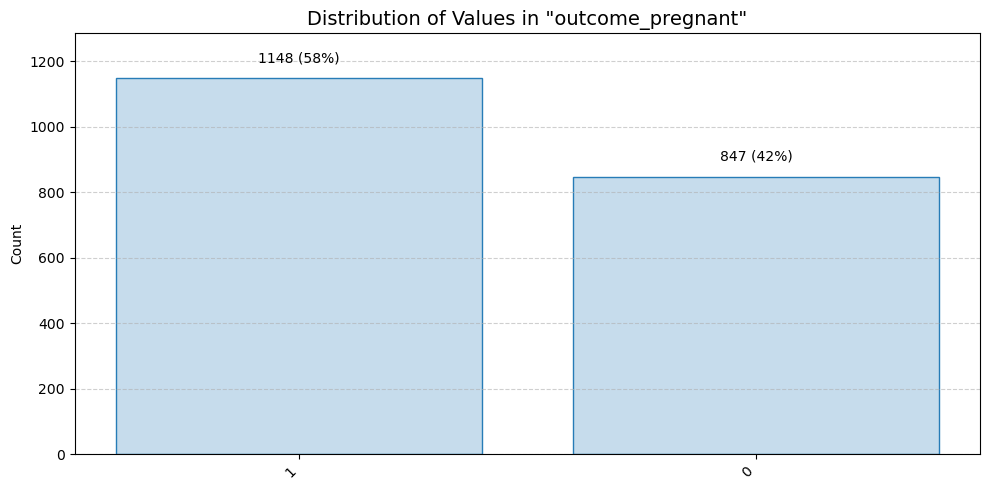

Plot saved to: ../plots/outcome_pregnant.jpg
Plotting column: age_group


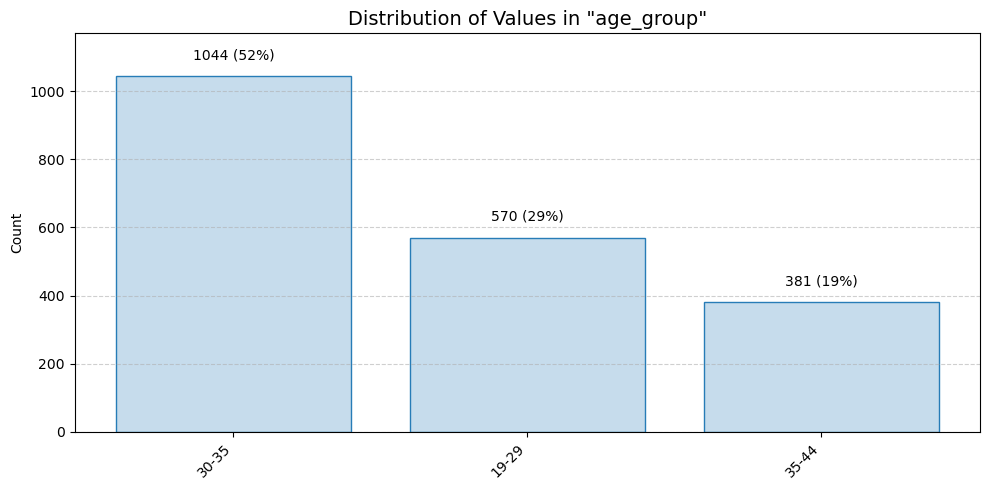

Plot saved to: ../plots/age_group.jpg
Plotting column: bmi_group


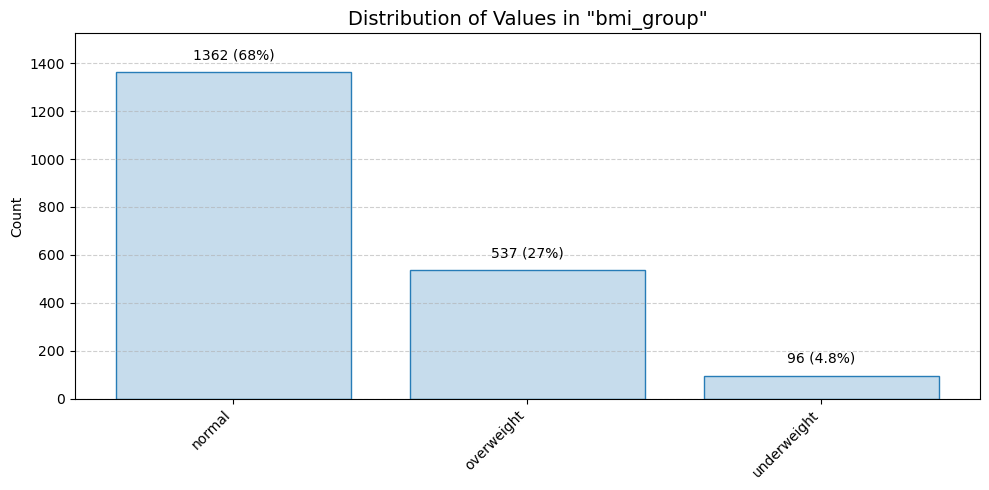

Plot saved to: ../plots/bmi_group.jpg
Plotting column: been_pregnant_before_binary


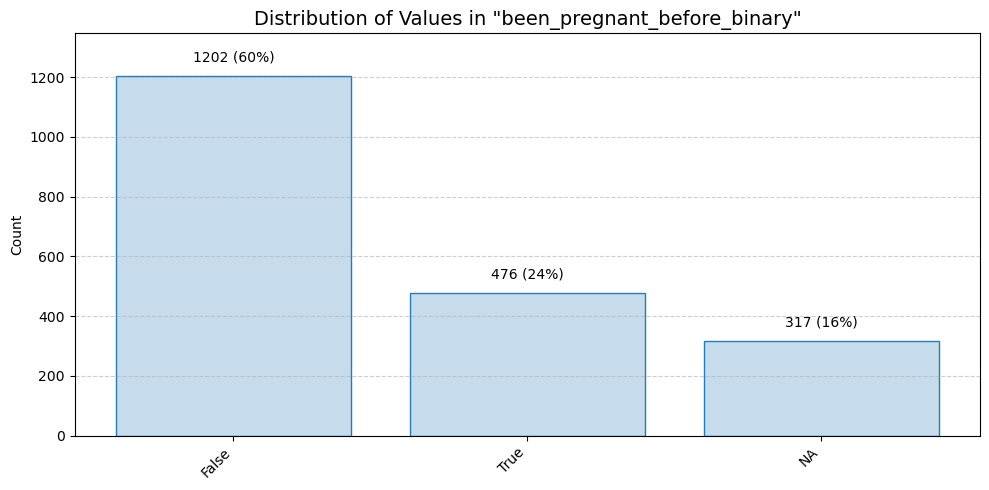

Plot saved to: ../plots/been_pregnant_before_binary.jpg
Plotting column: average_cycle_length_group


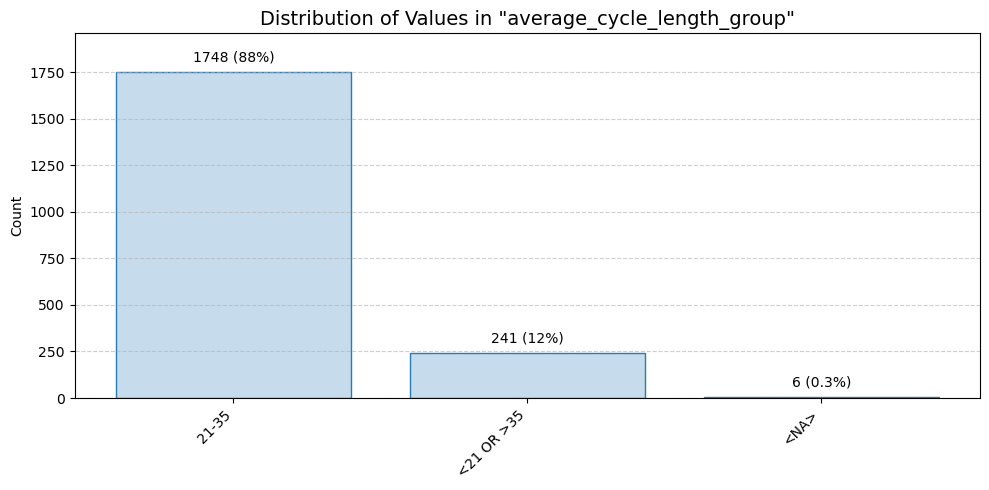

Plot saved to: ../plots/average_cycle_length_group.jpg
Plotting column: regular_cycle


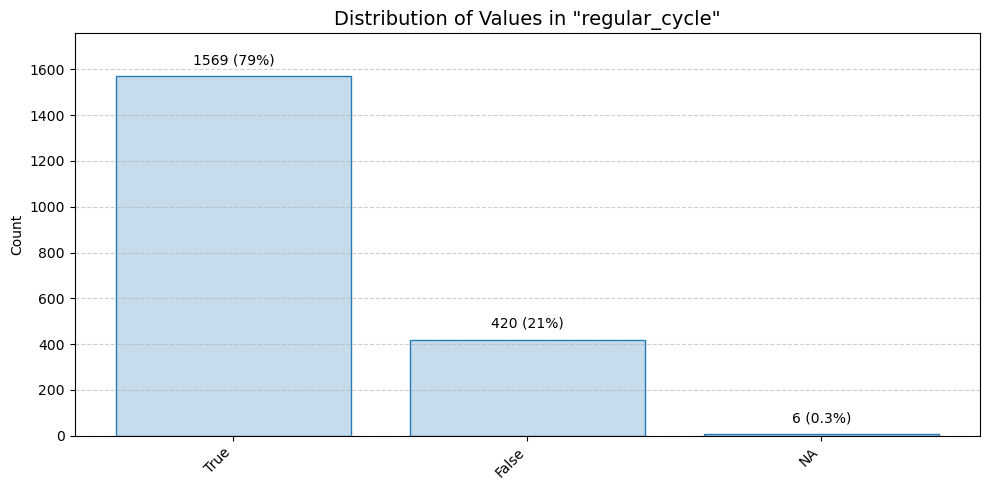

Plot saved to: ../plots/regular_cycle.jpg
Plotting column: university_education


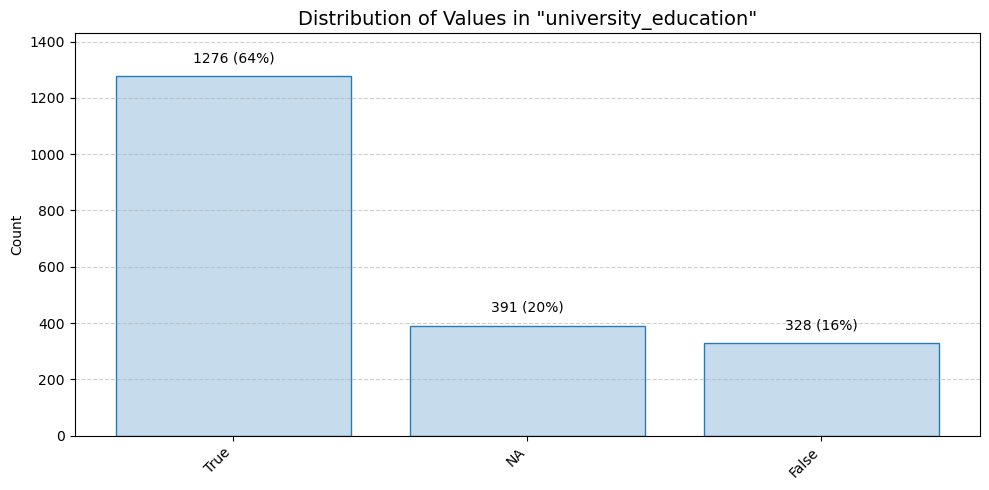

Plot saved to: ../plots/university_education.jpg
Plotting column: regular_sleep


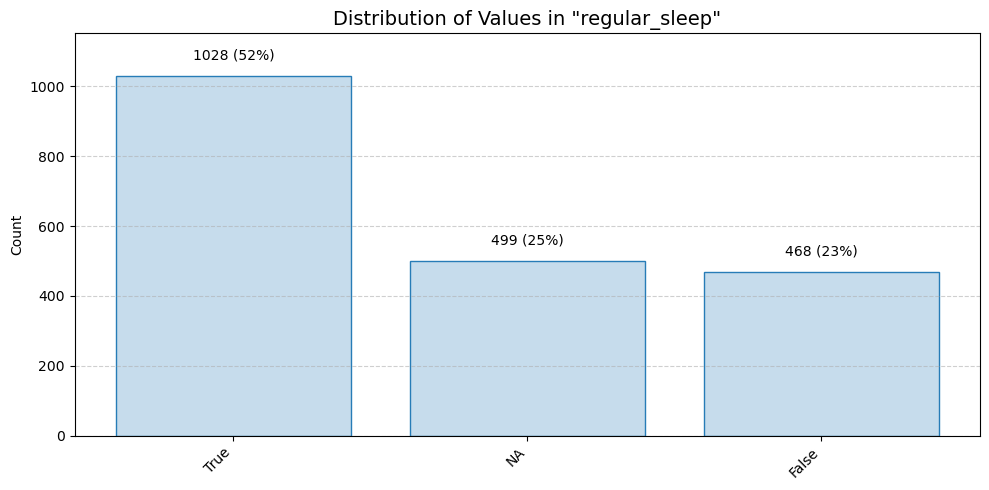

Plot saved to: ../plots/regular_sleep.jpg
Plotting column: intercourse_frequency_group


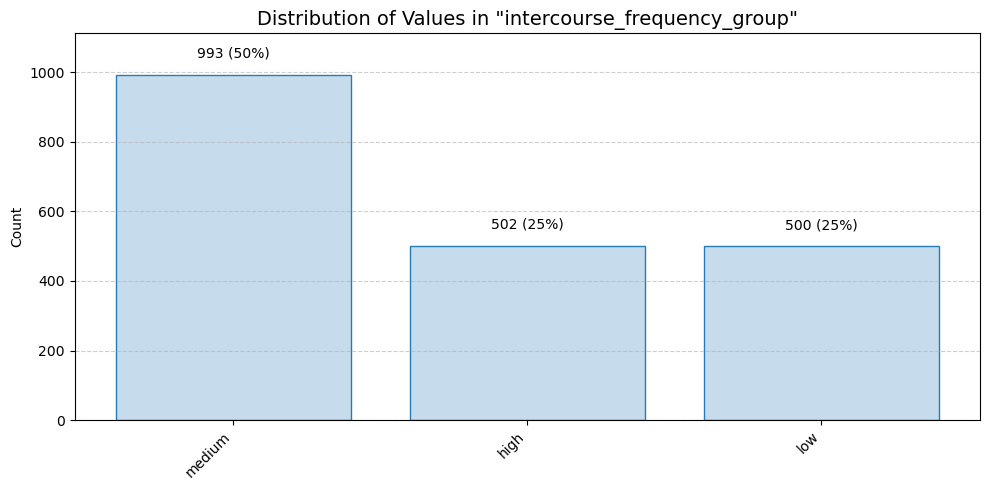

Plot saved to: ../plots/intercourse_frequency_group.jpg
Plotting column: dedication_group


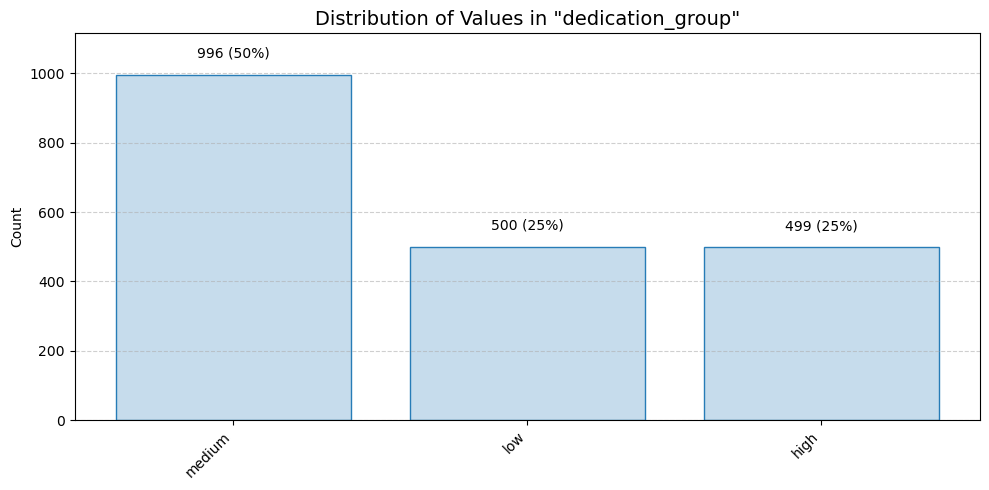

Plot saved to: ../plots/dedication_group.jpg


In [37]:
for col in df_small.columns:
    #if col in ['outcome_pregnant', 'n_cycles_trying']:
    #    continue
    print(f"Plotting column: {col}")
    plot_value_counts(df_small, col)

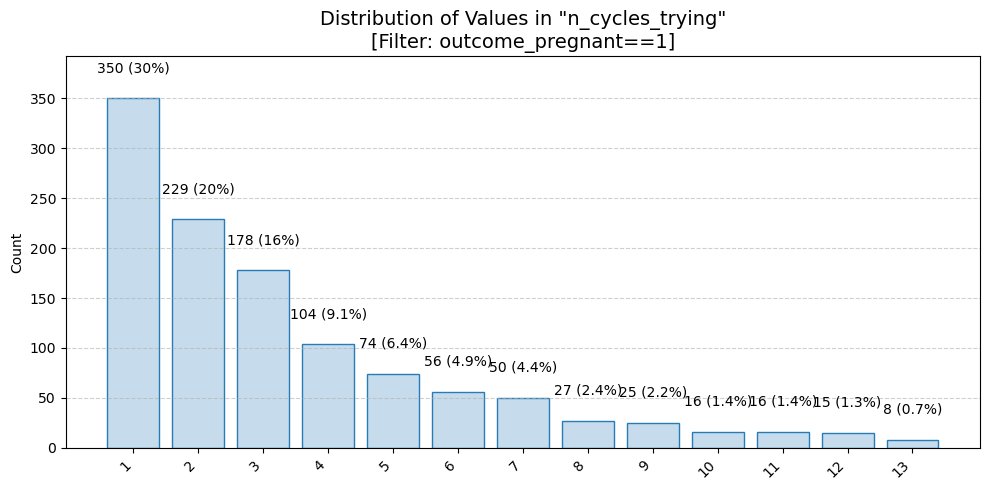

Plot saved to: ../plots/n_cycles_trying__outcome_pregnant_1.jpg


In [38]:
plot_value_counts(df_small, 'n_cycles_trying', query_string='outcome_pregnant==1')

In [39]:
df_small[df_small.outcome_pregnant==1].n_cycles_trying.mean()

np.float64(3.3754355400696863)

In [40]:
df_small.to_csv('../data/modified_small.csv', index=False)

In [41]:
df.columns

Index(['n_cycles_trying', 'outcome', 'outcome_pregnant', 'bmi', 'bmi_group',
       'age', 'age_group', 'country', 'region', 'been_pregnant_before',
       'been_pregnant_before_numeric', 'been_pregnant_before_binary',
       'education', 'education_numeric', 'university_education',
       'sleeping_pattern', 'sleeping_pattern_numeric', 'regular_sleep',
       'average_cycle_length', 'average_cycle_length_group',
       'cycle_length_std', 'regular_cycle', 'regular_cycle_numeric',
       'intercourse_frequency', 'intercourse_frequency_group', 'dedication',
       'dedication_group'],
      dtype='object')

In [42]:
df_small.columns

Index(['n_cycles_trying', 'outcome_pregnant', 'age_group', 'bmi_group',
       'been_pregnant_before_binary', 'average_cycle_length_group',
       'regular_cycle', 'university_education', 'regular_sleep',
       'intercourse_frequency_group', 'dedication_group'],
      dtype='object')

In [43]:
test_regular = (df.cycle_length_std < 5)

In [44]:
mask = (test_regular != df.regular_cycle_numeric)

In [45]:
df[mask]

,n_cycles_trying,outcome,outcome_pregnant,bmi,bmi_group,age,age_group,country,region,been_pregnant_before,been_pregnant_before_numeric,been_pregnant_before_binary,education,education_numeric,university_education,sleeping_pattern,sleeping_pattern_numeric,regular_sleep,average_cycle_length,average_cycle_length_group,cycle_length_std,regular_cycle,regular_cycle_numeric,intercourse_frequency,intercourse_frequency_group,dedication,dedication_group
639,1,pregnant,1,20.069204,normal,32,30-35,GB,Western Europe,"No, never",0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,0.035714,medium,0.500000,medium
857,2,not_pregnant,0,34.945324,overweight,30,30-35,GB,Western Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,0.000000,low,0.006667,low
1480,1,not_pregnant,0,22.582709,normal,28,19-29,SE,Nordic,"No, never",0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,0.000000,low,0.034483,low
1482,1,pregnant,1,26.577734,overweight,28,19-29,GB,Western Europe,"No, never",0.0,False,University,3.0,True,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,0.206897,high,0.551724,medium
1549,1,not_pregnant,0,18.906901,normal,25,19-29,SE,Nordic,"No, never",0.0,False,High school,1.0,False,Wake same every workday,3.0,True,NaN,<NA>,NaN,NaN,NaN,0.100000,medium,0.266667,medium
1917,1,not_pregnant,0,23.039758,normal,27,19-29,GB,Western Europe,NaN,NaN,NaN,University,3.0,True,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,0.055556,medium,0.055556,low


In [46]:
df.columns

Index(['n_cycles_trying', 'outcome', 'outcome_pregnant', 'bmi', 'bmi_group',
       'age', 'age_group', 'country', 'region', 'been_pregnant_before',
       'been_pregnant_before_numeric', 'been_pregnant_before_binary',
       'education', 'education_numeric', 'university_education',
       'sleeping_pattern', 'sleeping_pattern_numeric', 'regular_sleep',
       'average_cycle_length', 'average_cycle_length_group',
       'cycle_length_std', 'regular_cycle', 'regular_cycle_numeric',
       'intercourse_frequency', 'intercourse_frequency_group', 'dedication',
       'dedication_group'],
      dtype='object')

In [47]:
numeric_columns = [
    'n_cycles_trying',
    'outcome_pregnant', 
    'bmi',
    'age',
    'education_numeric',
    'been_pregnant_before_numeric',
    'sleeping_pattern_numeric',
    'average_cycle_length',
    'cycle_length_std',
    'intercourse_frequency',
    'dedication'
]

In [48]:
df[numeric_columns].to_csv('../data/modified_numeric.csv', index=False)

In [49]:
df[numeric_columns].columns[df[numeric_columns].isna().any()].tolist()

['education_numeric',
 'been_pregnant_before_numeric',
 'sleeping_pattern_numeric',
 'average_cycle_length',
 'cycle_length_std']